# TELANGANA

In [580]:
import pandas as pd

# Load the datasets for Telangana
df_tl_enrolment = pd.read_csv('/content/Telengana Enrolment Dataset.csv')
df_tl_demographic = pd.read_csv('/content/Telengana Demographic Dataset.csv')
df_tl_biometric = pd.read_csv('/content/Telengana Biometric Dataset.csv')

print("Telangana Enrolment Dataset:")
print(df_tl_enrolment.head())
print(df_tl_enrolment.info())
print(df_tl_enrolment.describe())

print("\nTelangana Demographic Dataset:")
print(df_tl_demographic.head())
print(df_tl_demographic.info())
print(df_tl_demographic.describe())

# Standardize the 'state' column in df_tl_biometric
df_tl_biometric['state'] = df_tl_biometric['state'].str.title()

print("\nTelangana Biometric Dataset:")
print(df_tl_biometric.head())
print(df_tl_biometric.info())
print(df_tl_biometric.describe())

Telangana Enrolment Dataset:
         date      state   district  pincode  age_0_5  age_5_17  \
0  01-06-2025  Telangana  Hyderabad   500028      295       178   
1  01-07-2025  Telangana  Hyderabad   500013      492       126   
2  01-07-2025  Telangana  Hyderabad   500001      253       132   
3  01-07-2025  Telangana  Hyderabad   500029       98        51   
4  01-07-2025  Telangana  Hyderabad   500032       92        53   

   age_18_greater  
0              11  
1              11  
2              23  
3              14  
4              20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51480 entries, 0 to 51479
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            51480 non-null  object
 1   state           51480 non-null  object
 2   district        51480 non-null  object
 3   pincode         51480 non-null  int64 
 4   age_0_5         51480 non-null  int64 
 5   age_5_17        51480 non-n

In [581]:
df_tl_enrolment['date'] = pd.to_datetime(df_tl_enrolment['date'], format='%d-%m-%Y')
df_tl_demographic['date'] = pd.to_datetime(df_tl_demographic['date'], format='%d-%m-%Y')
df_tl_biometric['date'] = pd.to_datetime(df_tl_biometric['date'], format='%d-%m-%Y')

merged_tl_df_temp = pd.merge(df_tl_enrolment, df_tl_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_tl_merged = pd.merge(merged_tl_df_temp, df_tl_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_tl_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_tl_merged[numeric_cols] = df_tl_merged[numeric_cols].fillna(0)

print("Data types after date conversion for df_tl_enrolment:")
print(df_tl_enrolment.info())
print("\nData types after date conversion for df_tl_demographic:")
print(df_tl_demographic.info())
print("\nData types after date conversion for df_tl_biometric:")
print(df_tl_biometric.info())

Data types after date conversion for df_tl_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51480 entries, 0 to 51479
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            51480 non-null  datetime64[ns]
 1   state           51480 non-null  object        
 2   district        51480 non-null  object        
 3   pincode         51480 non-null  int64         
 4   age_0_5         51480 non-null  int64         
 5   age_5_17        51480 non-null  int64         
 6   age_18_greater  51480 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.7+ MB
None

Data types after date conversion for df_tl_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105672 entries, 0 to 105671
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           10567

In [582]:
print("\nMerged Telangana DataFrame (df_tl_merged) head:")
print(df_tl_merged.head())
print("\nMerged Telangana DataFrame (df_tl_merged) info:")
print(df_tl_merged.info())
df_tl = df_tl_merged[df_tl_merged['state'] == 'Telangana'].copy()
df_tl['year'] = df_tl['date'].dt.year
df_tl['month'] = df_tl['date'].dt.month

print("Shape of df_tl:", df_tl.shape)
print("\nFirst 5 rows of df_tl with new 'year' and 'month' columns:")
print(df_tl.head())


Merged Telangana DataFrame (df_tl_merged) head:
        date      state  district   pincode  age_0_5  age_5_17  \
0 2025-03-01  Telangana  Adilabad  504001.0      0.0       0.0   
1 2025-03-01  Telangana  Adilabad  504002.0      0.0       0.0   
2 2025-03-01  Telangana  Adilabad  504101.0      0.0       0.0   
3 2025-03-01  Telangana  Adilabad  504102.0      0.0       0.0   
4 2025-03-01  Telangana  Adilabad  504103.0      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0          263.0        1367.0         383.0        450.0  
1             0.0           15.0          37.0           0.0          0.0  
2             0.0           20.0          50.0          43.0         31.0  
3             0.0           40.0         132.0          65.0         84.0  
4             0.0           43.0         120.0           0.0          0.0  

Merged Telangana DataFrame (df_tl_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [583]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_tl_agg = df_tl.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_tl_agg) head:")
print(df_tl_agg.head())
print("\nAggregated DataFrame (df_tl_agg) info:")
print(df_tl_agg.info())

Aggregated DataFrame (df_tl_agg) head:
   year  month      state              district  age_0_5  age_5_17  \
0  2025      3  Telangana              Adilabad      0.0       0.0   
1  2025      3  Telangana  Bhadradri Kothagudem      0.0       0.0   
2  2025      3  Telangana           Hanumakonda      0.0       0.0   
3  2025      3  Telangana             Hyderabad      0.0       0.0   
4  2025      3  Telangana              Jagitial      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0         1103.0        6240.0        1987.0       2845.0  
1             0.0          973.0        6840.0         326.0        513.0  
2             0.0          403.0        3357.0          47.0        174.0  
3             0.0         5344.0       26796.0        7732.0       9195.0  
4             0.0          505.0        2294.0         181.0        251.0  

Aggregated DataFrame (df_tl_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [584]:
import numpy as np

# 1. Create 'totalenrolments' column
df_tl_agg['totalenrolments'] = df_tl_agg['age_0_5'] + df_tl_agg['age_5_17'] + df_tl_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_tl_agg['childenrolments'] = df_tl_agg['age_0_5'] + df_tl_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_tl_agg['totaldemoupdates'] = df_tl_agg['demo_age_5_17'] + df_tl_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_tl_agg['totalbioupdates'] = df_tl_agg['bio_age_5_17'] + df_tl_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_tl_agg['CES'] = np.where(
    df_tl_agg['totalenrolments'] == 0,
    0,
    df_tl_agg['childenrolments'] / df_tl_agg['totalenrolments']
)

In [585]:
# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_tl_agg['DUR'] = np.where(
    df_tl_agg['totalenrolments'] == 0,
    0,
    df_tl_agg['totaldemoupdates'] / df_tl_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_tl_agg['BUR'] = np.where(
    df_tl_agg['totalenrolments'] == 0,
    0,
    df_tl_agg['totalbioupdates'] / df_tl_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_tl_agg) with new metrics head:")
print(df_tl_agg.head())

Aggregated DataFrame (df_tl_agg) with new metrics head:
   year  month      state              district  age_0_5  age_5_17  \
0  2025      3  Telangana              Adilabad      0.0       0.0   
1  2025      3  Telangana  Bhadradri Kothagudem      0.0       0.0   
2  2025      3  Telangana           Hanumakonda      0.0       0.0   
3  2025      3  Telangana             Hyderabad      0.0       0.0   
4  2025      3  Telangana              Jagitial      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0         1103.0        6240.0        1987.0       2845.0   
1             0.0          973.0        6840.0         326.0        513.0   
2             0.0          403.0        3357.0          47.0        174.0   
3             0.0         5344.0       26796.0        7732.0       9195.0   
4             0.0          505.0        2294.0         181.0        251.0   

   totalenrolments  childenrolments  totaldemoupdates  total

In [586]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_tl_agg['Enorm'] = df_tl_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_tl_agg['Dnorm'] = df_tl_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_tl_agg['Bnorm'] = df_tl_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_tl_agg['stdnorm'] = (df_tl_agg['Enorm'] + df_tl_agg['Dnorm'] + df_tl_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_tl_agg['ALBI'] = 1 - df_tl_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_tl_agg['ALBI'] = df_tl_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_tl_agg) with normalized metrics and ALBI head:")
print(df_tl_agg.head())

Aggregated DataFrame (df_tl_agg) with normalized metrics and ALBI head:
   year  month      state              district  age_0_5  age_5_17  \
0  2025      3  Telangana              Adilabad      0.0       0.0   
1  2025      3  Telangana  Bhadradri Kothagudem      0.0       0.0   
2  2025      3  Telangana           Hanumakonda      0.0       0.0   
3  2025      3  Telangana             Hyderabad      0.0       0.0   
4  2025      3  Telangana              Jagitial      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0             0.0         1103.0        6240.0        1987.0  ...   
1             0.0          973.0        6840.0         326.0  ...   
2             0.0          403.0        3357.0          47.0  ...   
3             0.0         5344.0       26796.0        7732.0  ...   
4             0.0          505.0        2294.0         181.0  ...   

   totaldemoupdates  totalbioupdates  CES  DUR  BUR  Enorm     Dnorm  \
0            7343.0 

In [587]:
df_tl_agg['Enormrisk'] = 1 - df_tl_agg['Enorm']
df_tl_agg['CESrisknorm'] = 1 - df_tl_agg['CES']
df_tl_agg['DURrisknorm'] = 1 - df_tl_agg['DUR']
df_tl_agg['BURrisknorm'] = 1 - df_tl_agg['BUR']
df_tl_agg['ALBIrisknorm'] = 1 - df_tl_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_tl_agg['riskscore'] = (
    df_tl_agg['Enormrisk'] +
    df_tl_agg['CESrisknorm'] +
    df_tl_agg['DURrisknorm'] +
    df_tl_agg['BURrisknorm'] +
    df_tl_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_tl_agg) with risk components and riskscore head:")
print(df_tl_agg.head())

Aggregated DataFrame (df_tl_agg) with risk components and riskscore head:
   year  month      state              district  age_0_5  age_5_17  \
0  2025      3  Telangana              Adilabad      0.0       0.0   
1  2025      3  Telangana  Bhadradri Kothagudem      0.0       0.0   
2  2025      3  Telangana           Hanumakonda      0.0       0.0   
3  2025      3  Telangana             Hyderabad      0.0       0.0   
4  2025      3  Telangana              Jagitial      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0             0.0         1103.0        6240.0        1987.0  ...  0.165372   
1             0.0          973.0        6840.0         326.0  ...  0.175957   
2             0.0          403.0        3357.0          47.0  ...  0.084679   
3             0.0         5344.0       26796.0        7732.0  ...  0.723825   
4             0.0          505.0        2294.0         181.0  ...  0.063036   

      Bnorm   stdnorm      ALB

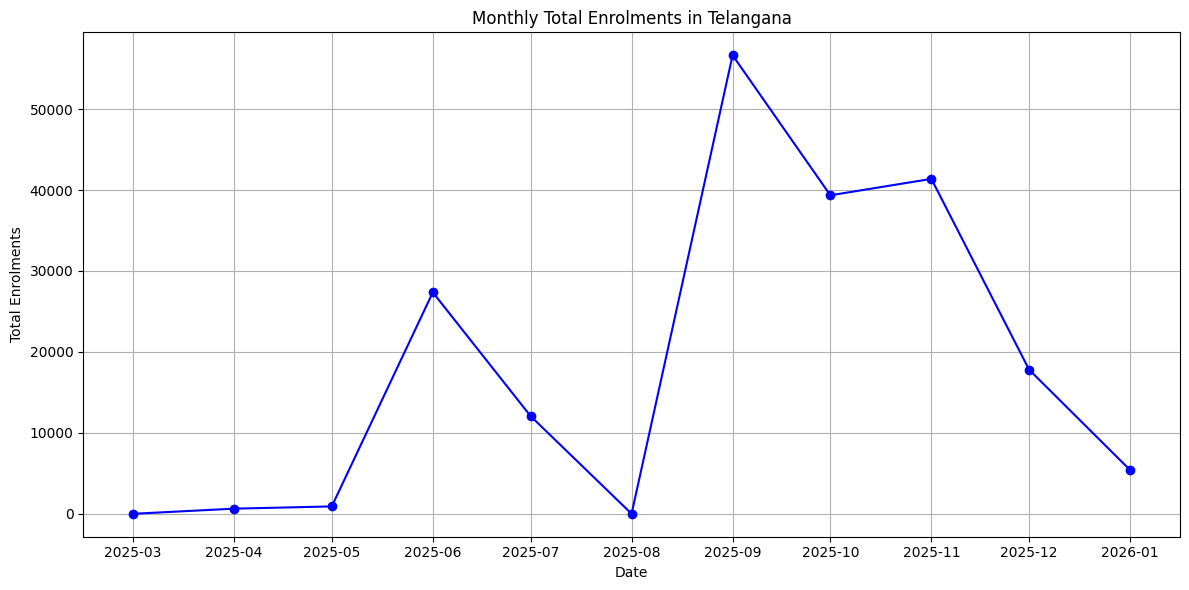

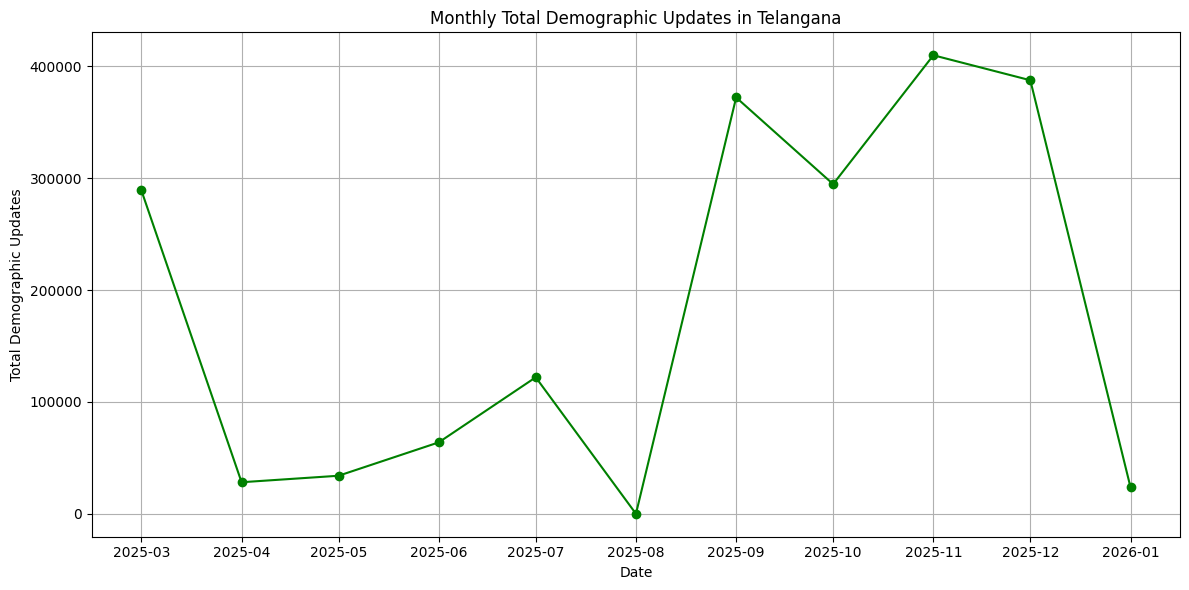

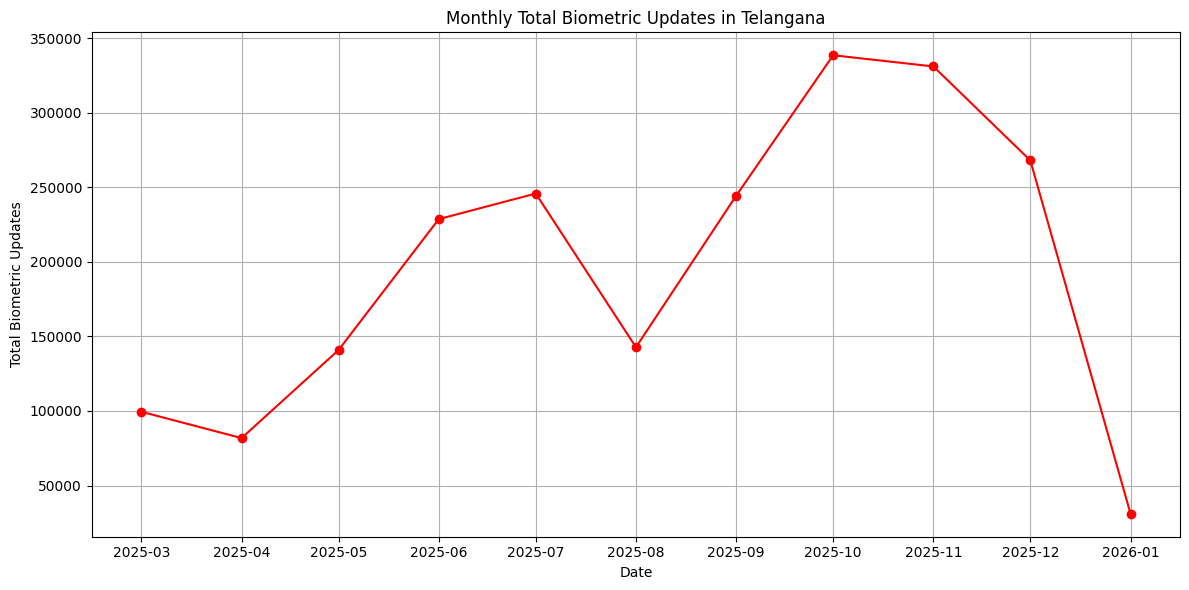

Monthly trend plots generated successfully.


In [588]:
import matplotlib.pyplot as plt
import seaborn as sns
df_tl_monthly_trends = df_tl_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_tl_monthly_trends['date'] = pd.to_datetime(df_tl_monthly_trends['year'].astype(str) + '-' + df_tl_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_tl_monthly_trends = df_tl_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tl_monthly_trends['date'], df_tl_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Telangana')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tl_monthly_trends['date'], df_tl_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Telangana')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tl_monthly_trends['date'], df_tl_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Telangana')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

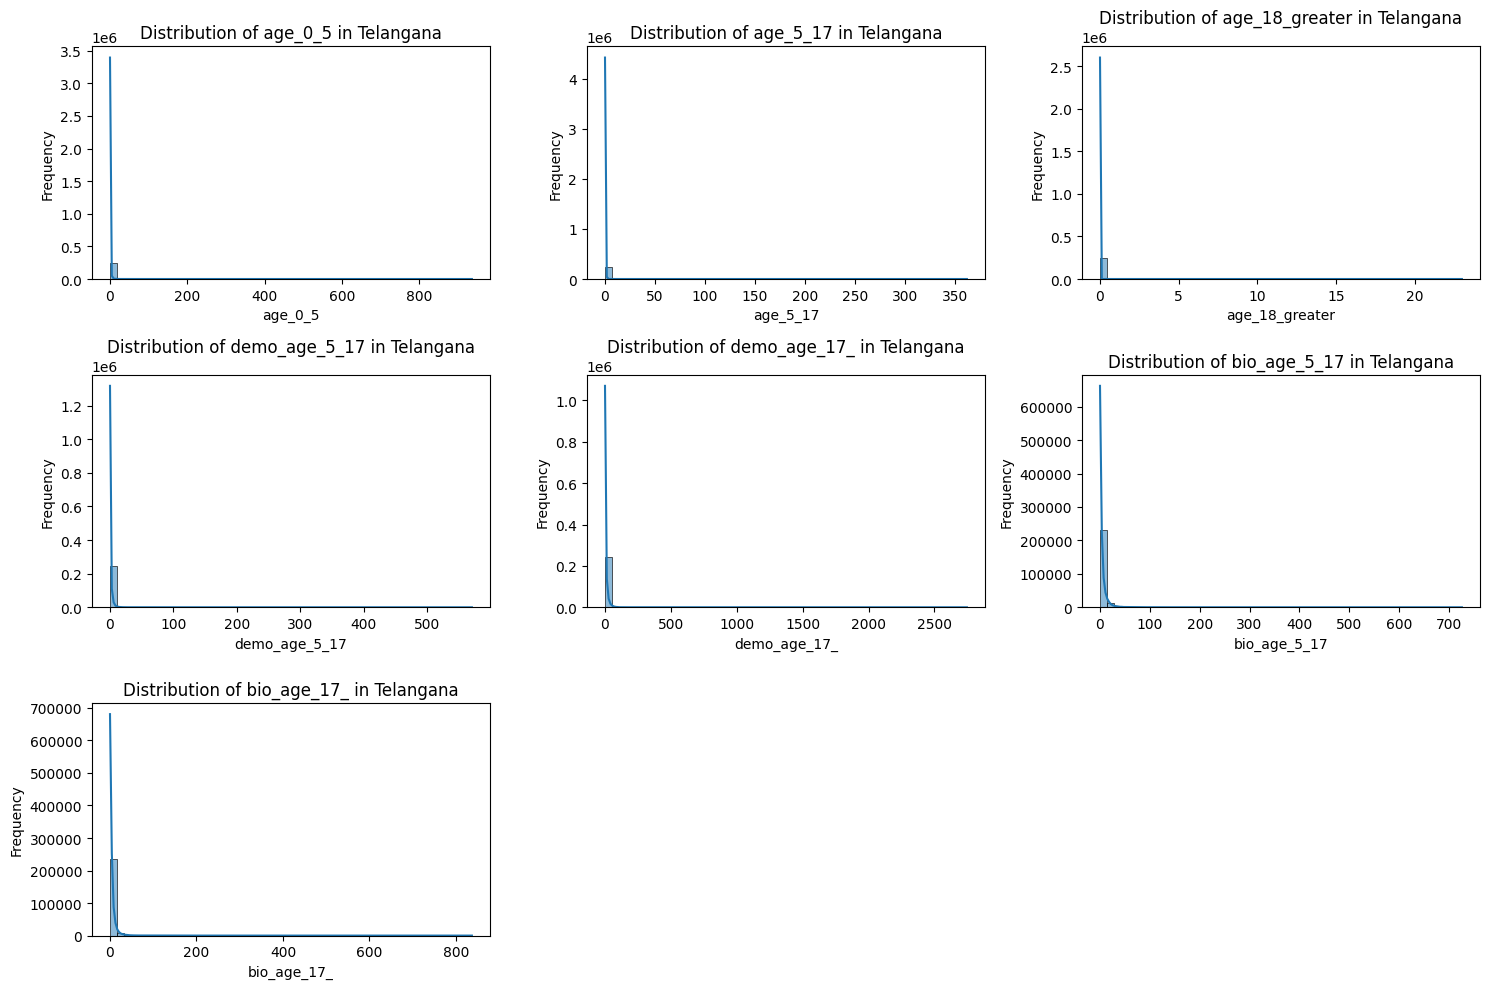

Histograms for numerical age-related columns displayed for Telangana.


In [603]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_tl_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Telangana')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Telangana.")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


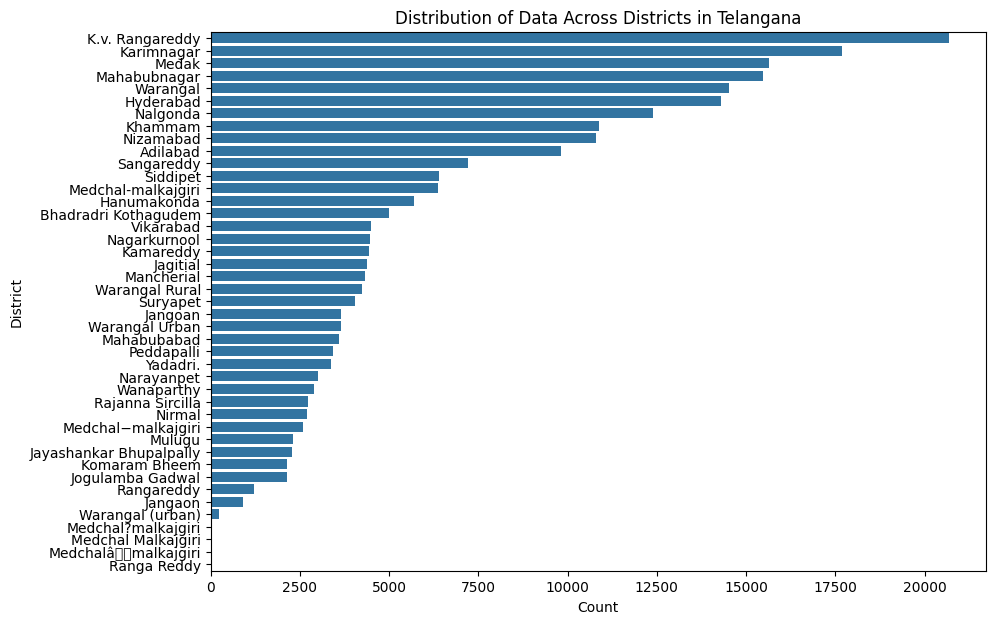

Count plot for 'district' displayed for Telangana.


In [604]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.countplot(data=df_tl_merged, y='district', order=df_tl_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Telangana')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Telangana.")

**Bivariate and Trivariate Analysis**

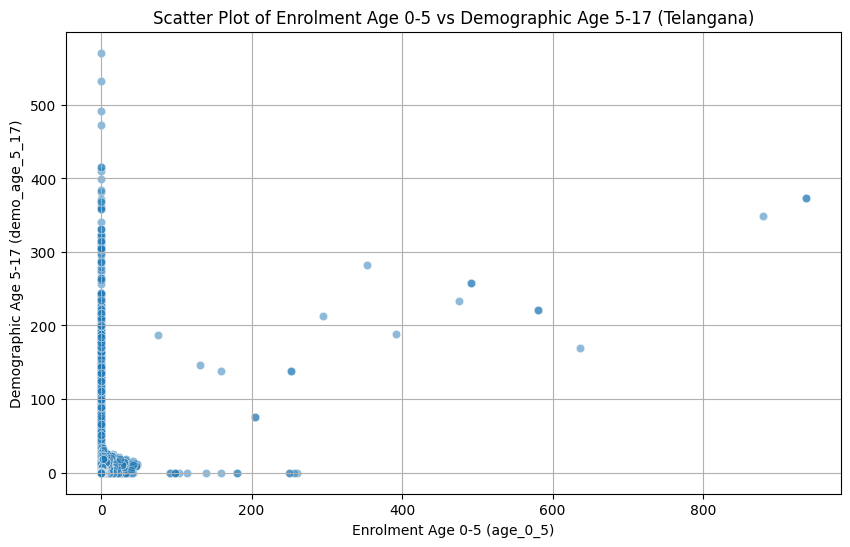

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Telangana.


In [589]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tl_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Telangana)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Telangana.")

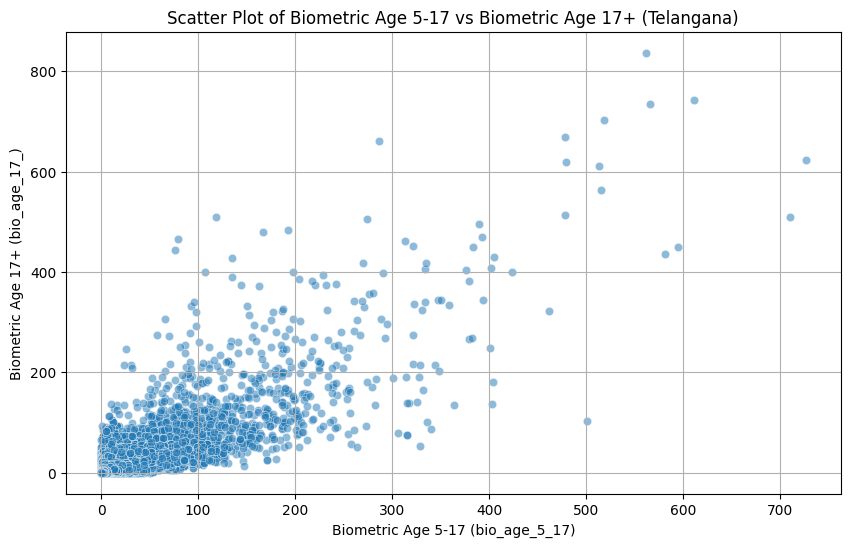

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Telangana.


In [590]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tl_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Telangana)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Telangana.")

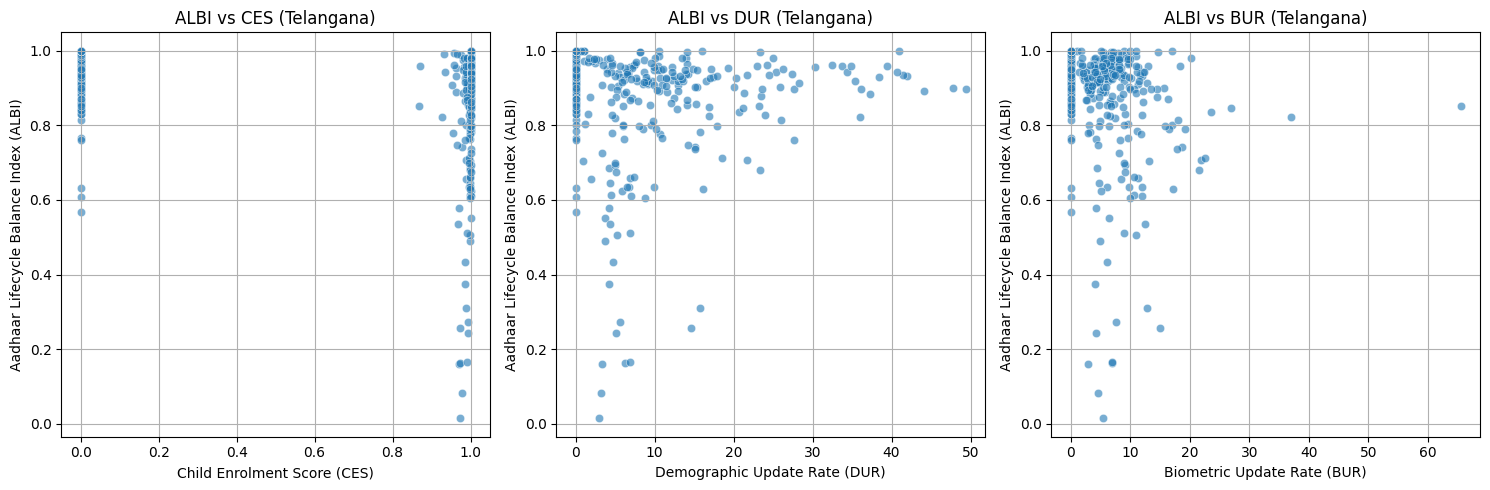

In [601]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Scatter plot for ALBI vs CES
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_tl_agg, x='CES', y='ALBI', alpha=0.6)
plt.title('ALBI vs CES (Telangana)')
plt.xlabel('Child Enrolment Score (CES)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs DUR
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_tl_agg, x='DUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs DUR (Telangana)')
plt.xlabel('Demographic Update Rate (DUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs BUR
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_tl_agg, x='BUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs BUR (Telangana)')
plt.xlabel('Biometric Update Rate (BUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

plt.tight_layout()
plt.show()

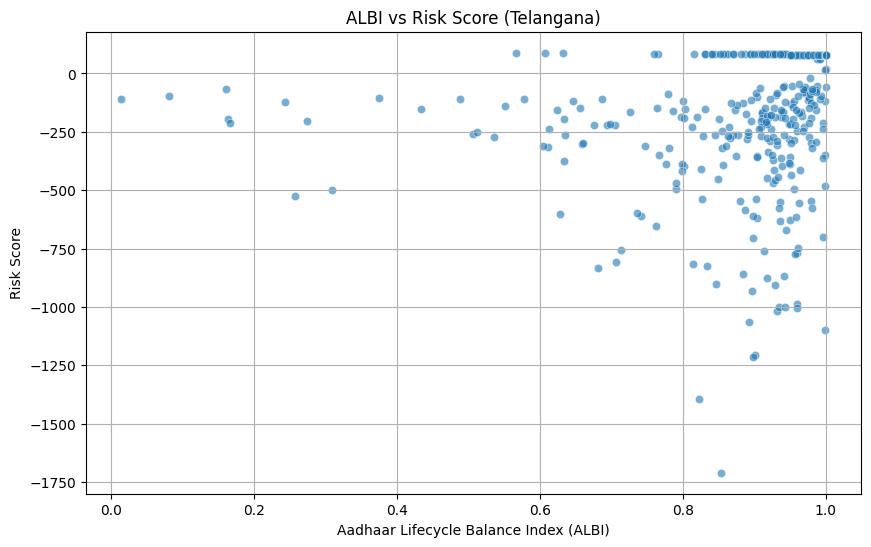

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tl_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Risk Score (Telangana)')
plt.xlabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()

In [591]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_tl = df_tl_merged[numerical_age_cols].corr()

print("Correlation Matrix for Telangana:")
print(correlation_matrix_tl)

Correlation Matrix for Telangana:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.895485        0.653537       0.249214   
age_5_17        0.895485  1.000000        0.688193       0.234057   
age_18_greater  0.653537  0.688193        1.000000       0.164362   
demo_age_5_17   0.249214  0.234057        0.164362       1.000000   
demo_age_17_    0.318375  0.293686        0.203789       0.932318   
bio_age_5_17    0.054789  0.033519        0.034020       0.271736   
bio_age_17_     0.042166  0.027202        0.031348       0.318060   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.318375      0.054789     0.042166  
age_5_17            0.293686      0.033519     0.027202  
age_18_greater      0.203789      0.034020     0.031348  
demo_age_5_17       0.932318      0.271736     0.318060  
demo_age_17_        1.000000      0.245005     0.300895  
bio_age_5_17        0.245005      1.000000     0.791818  
bio_age

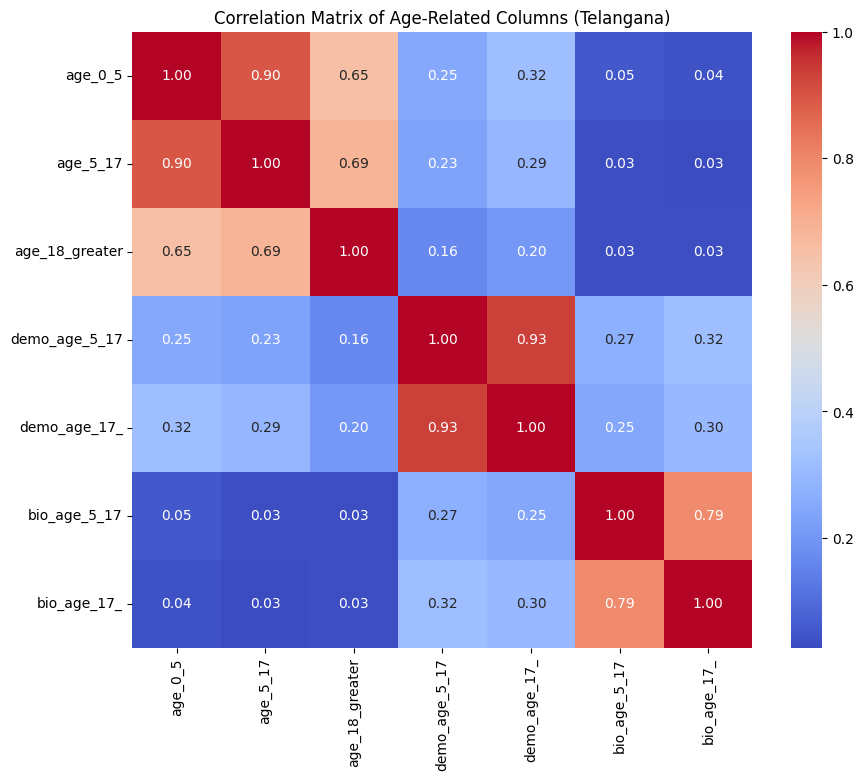

Correlation matrix heatmap for age-related columns displayed for Telangana.


In [592]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tl, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Telangana)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Telangana.")

In [593]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_tl_district_mean = df_tl_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Telangana:")
print(df_tl_district_mean.head())
print(df_tl_district_mean.info())

District-wise average age-related data for Telangana:
               district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0              Adilabad  0.406489  0.083461        0.000408       0.627283   
1  Bhadradri Kothagudem  0.669466  0.198560        0.008598       1.291542   
2           Hanumakonda  0.243243  0.033345        0.001404       0.413478   
3             Hyderabad  2.019866  0.617445        0.067152       2.388640   
4              Jagitial  0.527683  0.035088        0.005013       0.529733   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      4.302112      5.378941     4.625957  
1      7.156769      3.030394     3.295541  
2      4.262373      0.491576     2.628115  
3     15.148503     10.567292     7.969432  
4      4.526999      1.847118     1.693324  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district  

In [594]:
df_tl_district_mean['total_avg_age'] = df_tl_district_mean[age_cols_to_group].sum(axis=1)
df_tl_district_mean_top10 = df_tl_district_mean.nlargest(10, 'total_avg_age')

df_tl_district_mean_melted = df_tl_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

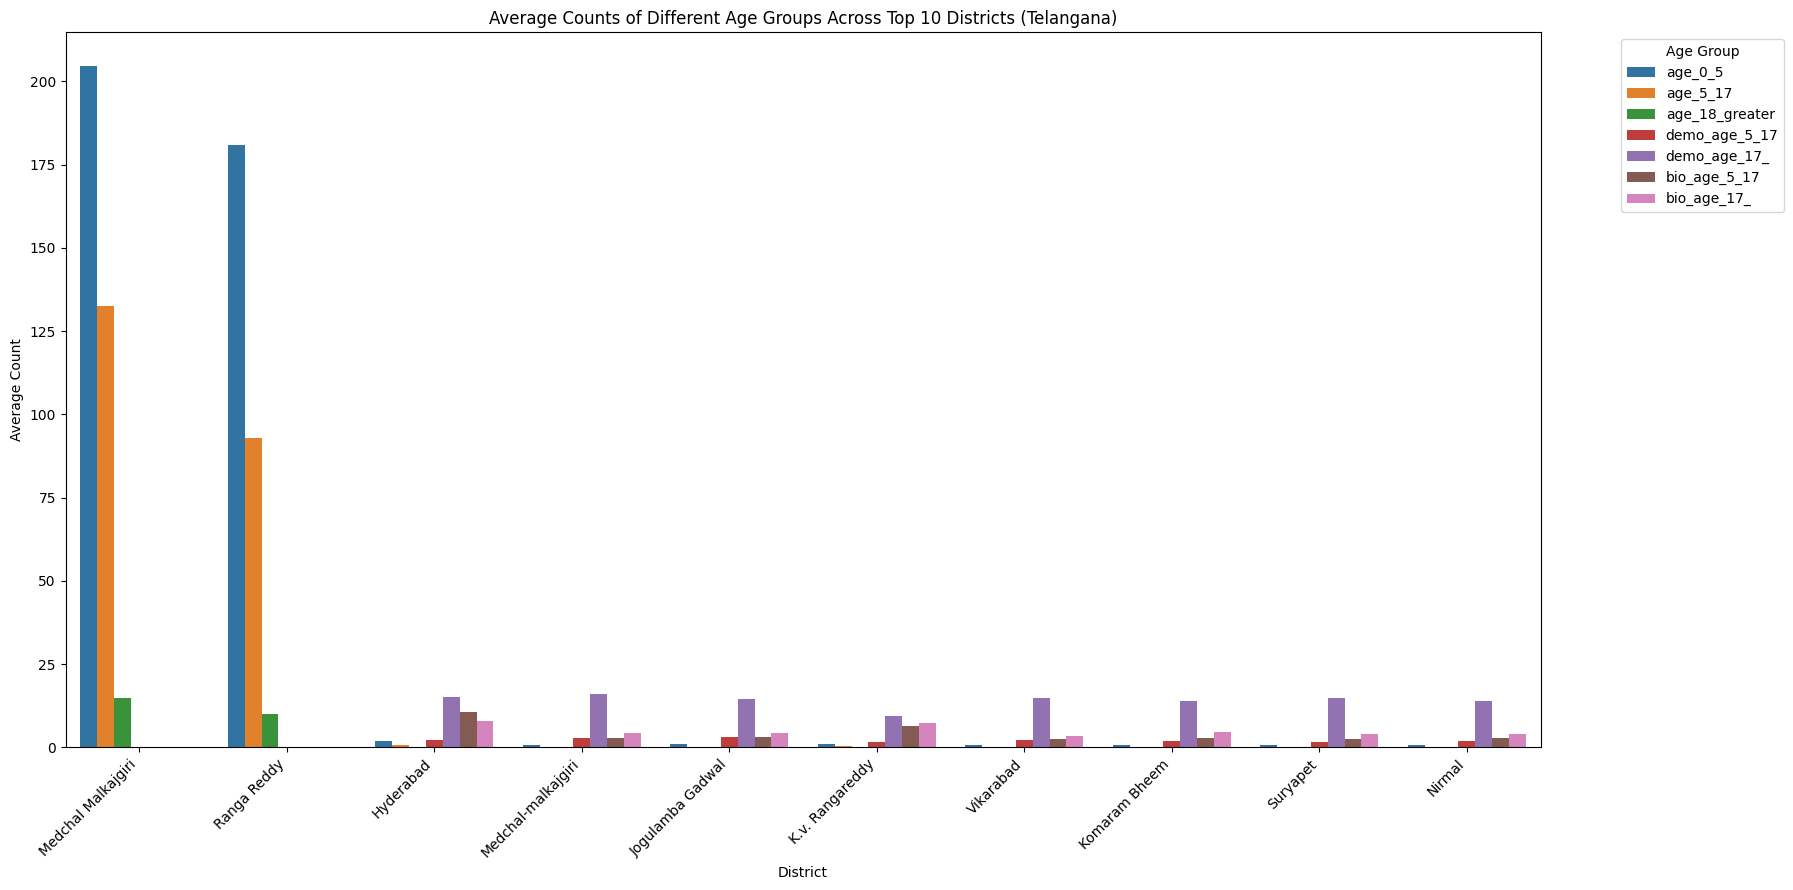

Grouped bar chart for average age-related counts across top 10 districts displayed for Telangana.


In [595]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_tl_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Telangana)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Grouped bar chart for average age-related counts across top 10 districts displayed for Telangana.")

In [596]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group df_tl_merged by date and sum the age-related columns
df_tl_time_trend = df_tl_merged.groupby('date')[age_cols_to_group].sum().reset_index()

# Sort by date to ensure proper trend plotting
df_tl_time_trend = df_tl_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Telangana:")
print(df_tl_time_trend.head())
print(df_tl_time_trend.info())

Time-series aggregated data (sum of age-related columns per date) for Telangana:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        48061.0      241075.0   
1 2025-04-01    487.0      82.0            65.0         4004.0       24209.0   
2 2025-05-01    736.0     154.0            21.0         5357.0       28655.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       43398.0      56069.0  
1       37496.0      44317.0  
2       55260.0      42996.0  
3        2552.0       2708.0  
4        2216.0       2465.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetim

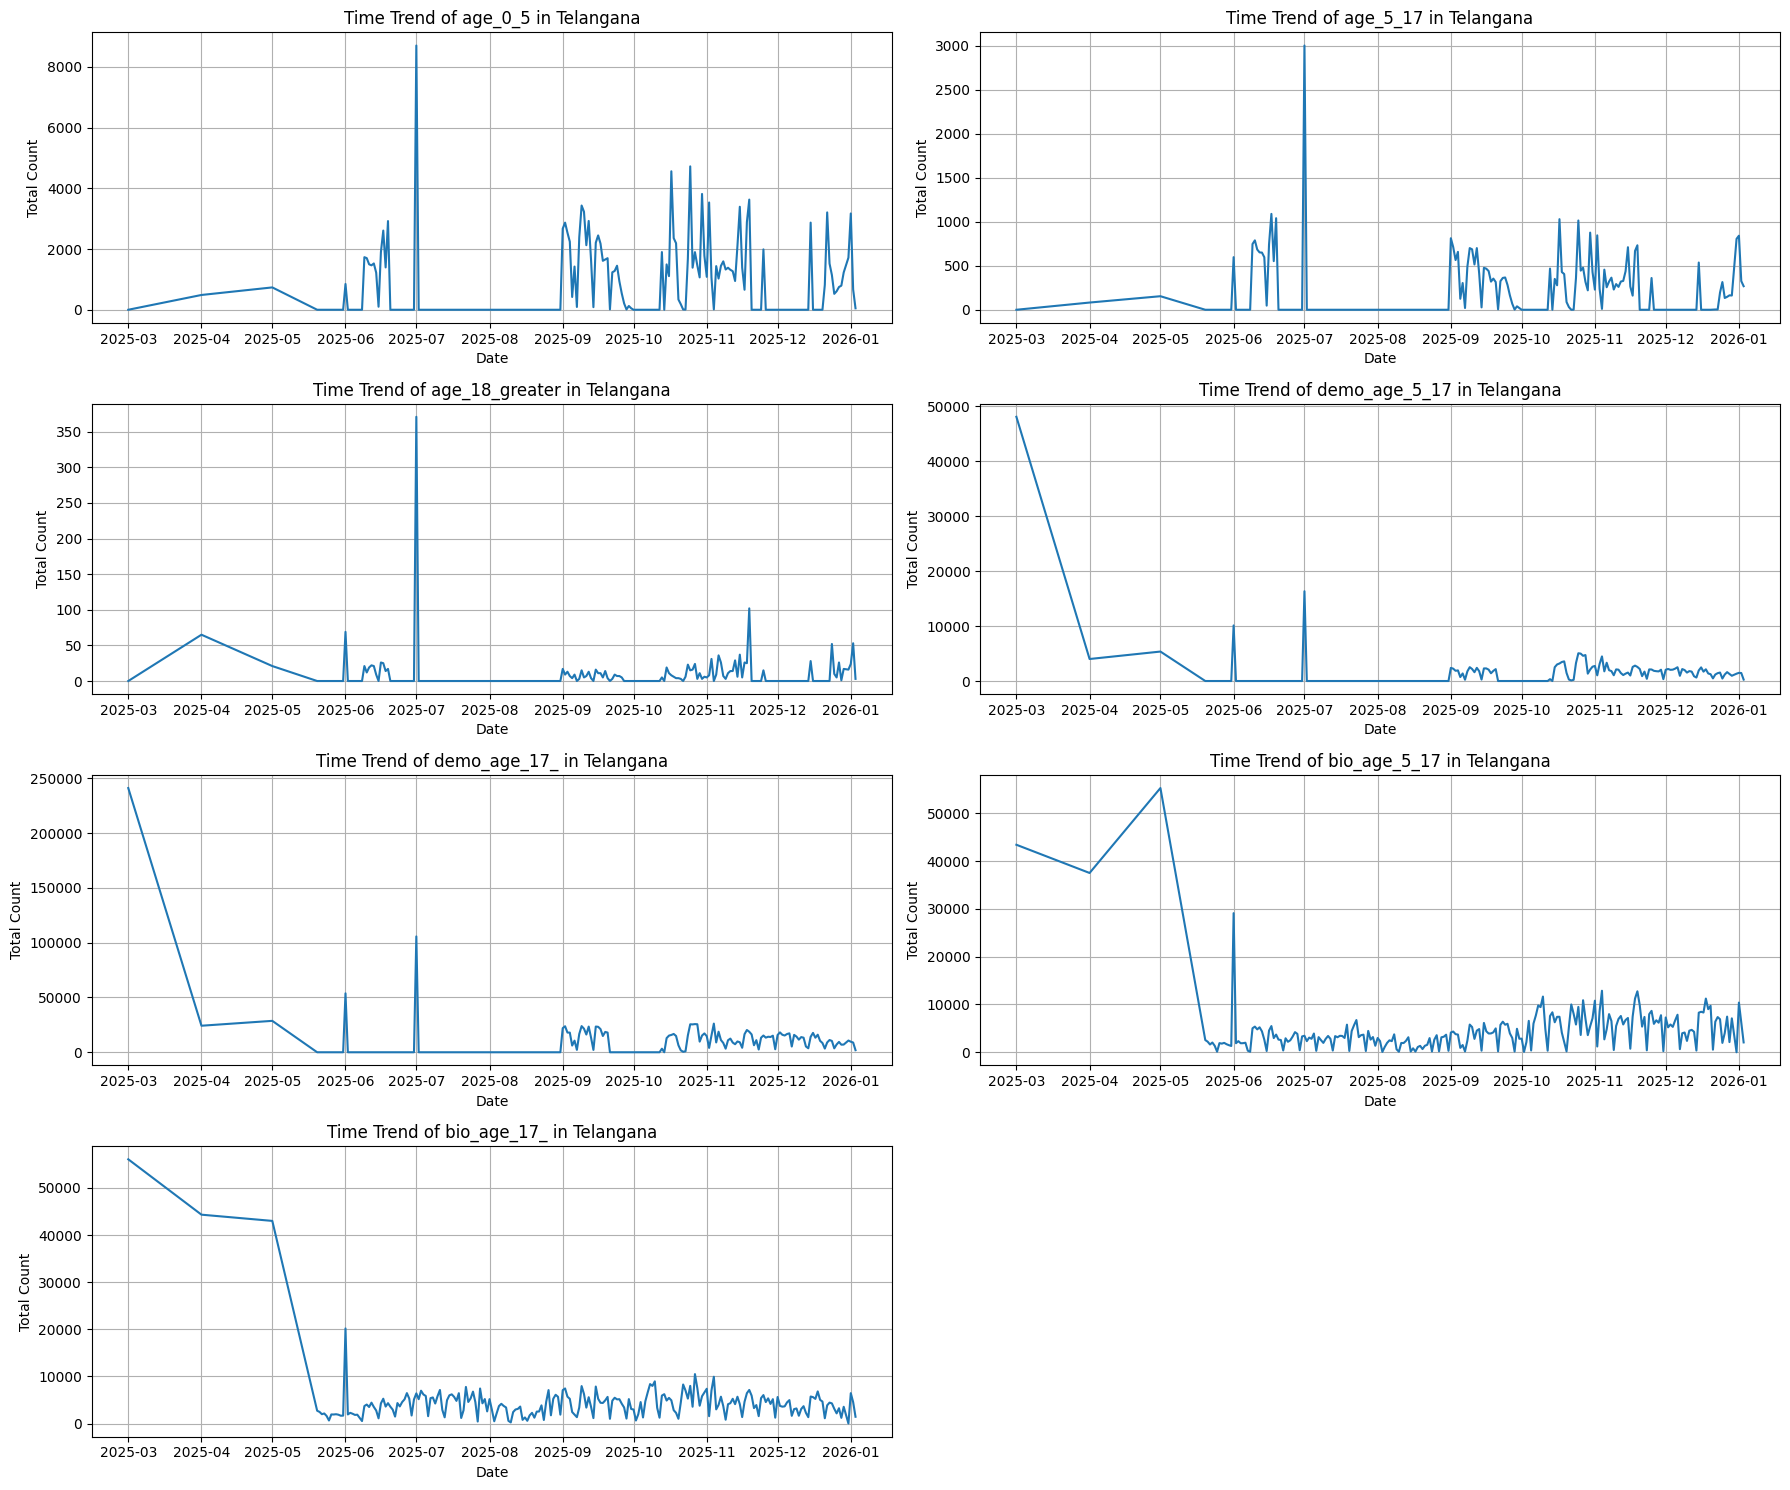

Insight: Line charts for each age-related column over time in Telangana provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [597]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_tl_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Telangana')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Telangana provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

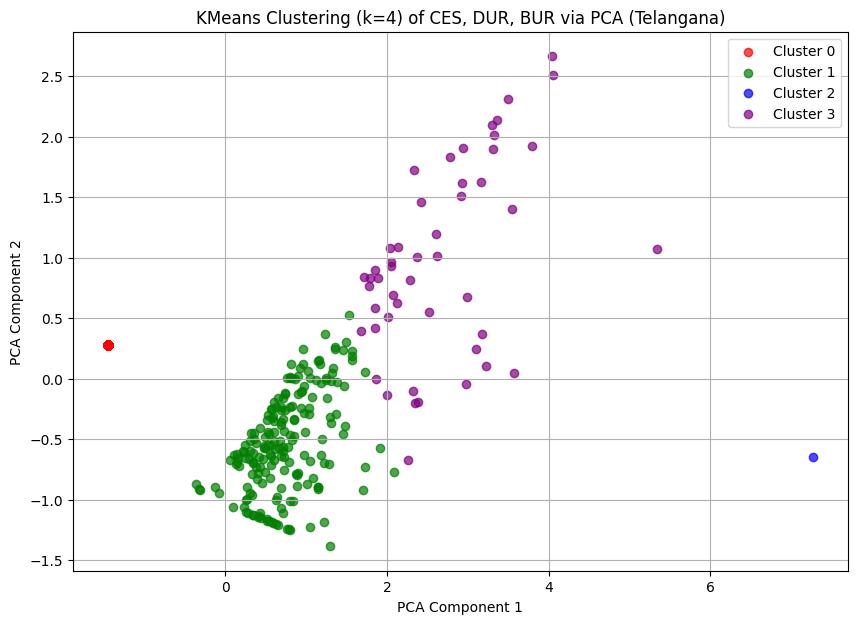

First 5 rows of df_tl_agg with 'clusterlabel' column:
   year  month      state              district  age_0_5  age_5_17  \
0  2025      3  Telangana              Adilabad      0.0       0.0   
1  2025      3  Telangana  Bhadradri Kothagudem      0.0       0.0   
2  2025      3  Telangana           Hanumakonda      0.0       0.0   
3  2025      3  Telangana             Hyderabad      0.0       0.0   
4  2025      3  Telangana              Jagitial      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0         1103.0        6240.0        1987.0  ...  0.108227   
1             0.0          973.0        6840.0         326.0  ...  0.018792   
2             0.0          403.0        3357.0          47.0  ...  0.004950   
3             0.0         5344.0       26796.0        7732.0  ...  0.379130   
4             0.0          505.0        2294.0         181.0  ...  0.009676   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DUR

In [598]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_tl_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_tl_agg
df_tl_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_tl_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Telangana)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_tl_agg with 'clusterlabel' column:")
print(df_tl_agg.head())

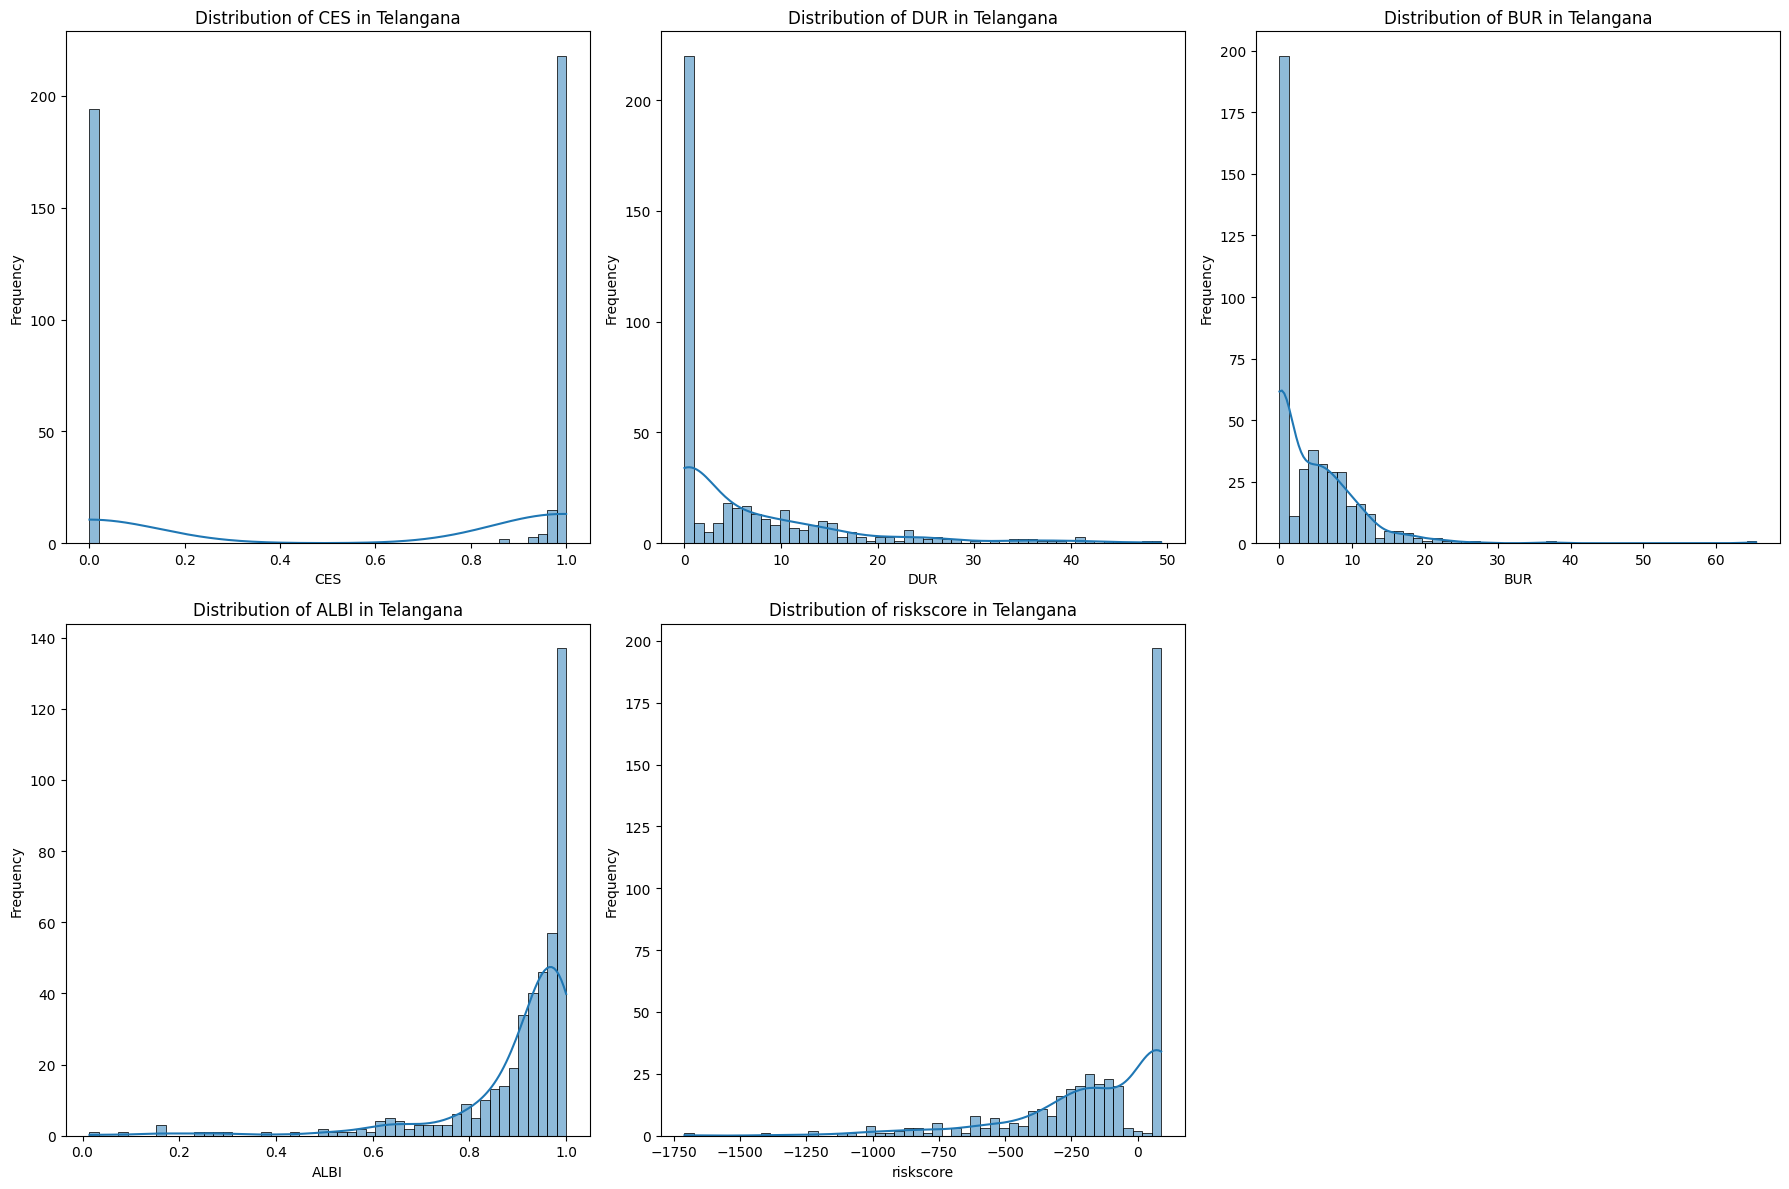

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Telangana.


In [599]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_tl_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Telangana')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Telangana.")

In [600]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_tl_agg['year'].max()
latest_month = df_tl_agg[df_tl_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_tl_agg for the latest year and month
df_latest_month = df_tl_agg[(df_tl_agg['year'] == latest_year) & (df_tl_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
               district  CES
               Adilabad  1.0
   Bhadradri Kothagudem  1.0
            Hanumakonda  1.0
                Jangoan  1.0
                Jangaon  1.0
       Jogulamba Gadwal  1.0
Jayashankar Bhupalpally  1.0
               Yadadri.  1.0
               Warangal  1.0
          Komaram Bheem  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
            district      CES
Medchalâmalkajgiri 0.000000
      Warangal Rural 0.935484
            Jagitial 0.953704
  Medchal-malkajgiri 0.954751
              Mulugu 0.956522
           Nizamabad 0.966777
           Hyderabad 0.974308
     K.v. Rangareddy 0.979253
            Siddipet 0.985507
           Kamareddy 0.989583

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
      district       DUR
Warangal Rural 12.193548
      Suryapet 11.415094
        Nirmal 10.323077
    Peddapalli  9.578

## Summary (Telangana):

The Aadhaar lifecycle analysis for Telangana provides a detailed view of enrolment and update activities across its districts. The `df_tl_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_tl_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Most districts (Adilabad, Bhadradri Kothagudem, Jangaon, Jayashankar Bhupalpally, Jogulamba Gadwal, Kamareddy, Komaram Bheem, Mahabubabad, Mahabubnagar, Mancherial) achieved a CES of 1.0, indicating that all enrolments were child enrolments in the latest period. Nagarkurnool (0.941) and Nalgonda (0.938) had slightly lower scores.
    *   **DUR (Demographic Update Rate)**: Hyderabad (5.33) and Medchal Malkajgiri (3.86) had the highest DUR, suggesting strong demographic update activity relative to enrolments. Narayanpet (0.0) and Nagarkurnool (0.765) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: Hyderabad (5.32) and Rangareddy (4.72) showed the highest BURs, while Narayanpet (0.0) and Nagarkurnool (0.353) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Narayanpet (1.0), Nagarkurnool (0.985), and Mulugu (0.979) exhibited the best balance, close to 1. Hyderabad (0.399) and Medchal Malkajgiri (0.428) had the lowest balance.
    *   **Risk Score**: Narayanpet (80.0) and Nagarkurnool (75.83) showed the highest risk scores. Similar to other states, a negative risk score was observed for Hyderabad (-106.96), which suggests the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Telangana's districts.

### Conclusion:

Telangana presents a varied landscape in Aadhaar lifecycle management, with some districts showing excellent performance in specific areas while others face challenges in updating and balancing their enrolment and update activities. The consistent observation of problematic `riskscore` values across multiple states, including Telangana, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.